#Data Cleaning and Preprocessing

In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 566.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
# import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [26]:
jobpost_df = pd.read_csv('cleaned_jobs.csv')

In [27]:
# drop work_type as it is duplicated column for formatted_work_type
jobpost_df.drop('work_type', axis=1, inplace=True)

In [28]:
# Change country code to country name
country_mapping = {
    'US': 'United States',
    'CA': 'Canada',
    'FR': 'France',
    'GB': 'United Kingdom',
    '0': 'Unknown',
    'OO': 'Unknown',
    'NL': 'Netherlands',
    'ID': 'Indonesia',
    'DK': 'Denmark',
    'LI': 'Liechtenstein',
    'JP': 'Japan',
    'CH': 'Switzerland',
    'BE': 'Belgium',
    'SE': 'Sweden',
    'IN': 'India',
    'AU': 'Australia',
    'DE': 'Germany',
    'CN': 'China',
    'ES': 'Spain',
    'KR': 'South Korea',
    'MT': 'Malta',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IT': 'Italy',
    'LU': 'Luxembourg',
    'EE': 'Estonia',
    'AT': 'Austria',
    'BM': 'Bermuda',
    'FI': 'Finland',
    'AE': 'United Arab Emirates',
    'AZ': 'Azerbaijan',
    'CO': 'Colombia',
    'IS': 'Iceland',
    'TW': 'Taiwan',
    'KY': 'Cayman Islands',
    'MX': 'Mexico',
    'SG': 'Singapore',
    'NO': 'Norway',
    'HK': 'Hong Kong'
}

jobpost_df['country'] = jobpost_df['country'].map(country_mapping)

In [8]:
# change nan to 0 for remote_allowed
jobpost_df['remote_allowed'].fillna(0, inplace=True)

/var/folders/9q/vqgvcv992rb1j75lkp2l_80h0000gn/T/ipykernel_42040/1658161719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobpost_df['remote_allowed'].fillna(0, inplace=True)


In [9]:
jobpost_df['state'] = jobpost_df['state'].str.upper()
jobpost_df['city'] = jobpost_df['city'].str.upper()

In [10]:
# function to map state values:

def clean_state_column(state_column):
    state_mapping = {
        'NEW JERSEY': 'NJ',
        'WI': 'WI',
        'ILLINOIS': 'IL',
        'CALIFORNIA': 'CA',
        '01824': 'NA',
        'MANITOBA': 'NA',
        'PENNSYLVANIA': 'PA',
        'IL': 'IL',
        'OH': 'OH',
        'MI': 'MI',
        'WA': 'WA',
        'GA': 'GA',
        'WY': 'WY',
        'INDIANA': 'IN',
        'WASHINGTON': 'WA',
        'CA': 'CA',
        'GEORGIA': 'GA',
        'OREGON': 'OR',
        'CALIFORNIA': 'CA',
        '0': 'NA',
        'TEXAS': 'TX',
        'NY': 'NY',
        'TX': 'TX',
        'CAMBRIDGESHIRE': 'IP', # Province from United Kingdom (GB)
        'MA': 'MA',
        'NORTH CAROLINA': 'NC',
        'NE': 'NE',
        'NEW YORK': 'NY',
        'MINNESOTA': 'MN',
        'DISTRICT OF COLUMBIA': 'DC',
        'NORTH YORKSHIRE': 'KV', # Province from United Kingdom (GB)
        'SOUTH DAKOTA': 'SD',
        'TX': 'TX',
        'NORTH HOLLAND': 'NL-NH', # Province from Netherlands
        'AZ': 'AZ',
        'TN': 'TN',
        'CO': 'CO',
        'FLORIDA': 'FL',
        'ARIZONA': 'AZ',
        'VIRGINIA': 'VA',
        'VA': 'VA',
        'OR': 'OR',
        'UT': 'UT',
        'TENNESSEE': 'TN',
        'MO': 'MO',
        'NC': 'NC',
        'DC': 'DC',
        'PA': 'PA',
        'FL': 'FL',
        'CONNECTICUT': 'CT',
        'OHIO': 'OH',
        'QUÉBEC': 'QC',
        'BASSETT, VA': 'VA',
        'ENGLAND': 'JK', # Province from United Kingdom (GB)
        'COLORADO': 'CO',
        'SOUTH CAROLINA': 'SC',
        'LEEDS': 'NA', # It is a city in West Yorkshire, England
        'LOUISIANA': 'LA',
        'FRANCE': 'NA', # It is a country
        'NEBRASKA': 'NE',
        'AR': 'AR',
        'ARKANSAS': 'AR',
        'HI': 'HI',
        'MICHIGAN': 'MI',
        'FLEVOLAND': 'NL-FL', # Province from Netherlands
        'IA': 'IA',
        'MN': 'MN',
        'COUNTY ARMAGH': 'COUNTY ARMAGH',
        'LA': 'LA',
        'TX': 'TX',
        'CORNWALL': 'CORNWALL',
        'HERTFORDSHIRE': 'JY', # Province from United Kingdom (GB)
        'ZH': 'ZH', # Zürich - Canton of Zürich
        'KS': 'KS',
        'HAMPSHIRE': 'JW', # Province from United Kingdom (GB)
        'ONTARIO': 'ON', # Canadian province
        'PR': 'PR', # Puerto Rico - State of US
        'BC': 'BC', # British Columbia - Canadian Province
        'UTAH': 'UT',
        'WA ': 'WA',
        'MISSOURI': 'MO',
        'NEW HAMPSHIRE': 'NH', # US state
        'TN': 'TN',
        'MASSACHUSETTS': 'MA',
        'LONDON': 'NA', # It is a city
        'NEW YORK': 'NY',
        'CT': 'CT',
        'PARIS': 'NA', # It is a city
        'CA': 'CA',
        'QUEBEC': 'QC',
        'STOCKHOLM COUNTY': 'NA', # city
        'NJ': 'NJ',
        'N.C.': 'NC',
        'NM': 'NM',
        'IDAHO': 'ID',
        'MD': 'MD',
        'IN': 'IN',
        'NORDJYLLAND': 'NORDJYLLAND',
        'ON': 'ON',
        'MARYLAND': 'MD',
        'UNKNOWN': 'NA',
        'WISCONSIN': 'WI',
        'MAHARASHTRA': 'MH', # state of India
        'DELAWARE': 'DE',
        'AK': 'AK',
        'CA - CALIFORNIA': 'CA',
        'UNITED STATES (+1)': 'NA',
        'QLD': 'NA',
        'NEVADA': 'NV',
        '85226': 'NA',
        'BAYERN': 'NA',
        'RI': 'RI',
        'SC - SOUTH CAROLINA': 'SC',
        'GREATER LONDON': 'JS', # Province from United Kingdom (GB)
        'ZURICH': 'ZURICH',
        'SC': 'SC',
        'COMMUNITY OF MADRID': 'MADRID',
        'CHANGZHOU': 'NA', # city in Jiangsu province from China
        'NEDERLAND': 'NA', # country
        'USA': 'NA', # country
        'IN': 'IN',
        'NEW JERSEY ': 'NJ',
        'ID': 'ID',
        'ISRAEL': 'IL',
        'TEXAS ': 'TX',
        'ALABAMA': 'AL',
        'ANTRIM': 'I5', # Province from United Kingdom (GB)
        'CA ': 'CA',
        'KENTUCKY': 'KY',
        'AL': 'AL',
        'RHODE ISLAND': 'RI',
        'SZ': 'NA', # country
        'VT': 'VT',
        'OKLAHOMA': 'OK',
        'KY': 'KY',
        'BW': 'NA', # city
        'MS': 'MS',
        'RHINELAND-PALATINATE': 'DE-RP',
        'NORTH RHINE-WESTPHALIA': 'DE_NW',
        'WEST MIDLANDS': 'LZ', # Province from United Kingdom (GB)
        'MA ': 'MA',
        'NEW MEXICO': 'NM',
        'GLOBAL': 'NA',
        'BASELSTADT': 'Basel-Stadt', # Canton in Switzerland
        'HESSEN': 'DE-HE', # German state
        'JAPAN': 'NA', # country
        'LUCCA': 'LU', # Province of Italy
        'CA': 'CA',
        'BARCELONA': 'NA', # city
        'NV': 'NV',
        'ND': 'ND',
        'WEST SUSSEX': 'M0', # Province from United Kingdom (GB)
        'MAINE': 'ME',
        'TENNESSEE': 'TN',
        'KANTO': 'KANTO Region', # Region in Japan
        'ÎLE-DE-FRANCE': 'HB', # France Province
        'VA': 'VA',
        'NSW': 'NSW', # State from Austrealia
        'MA': 'MA',
        'NEW YORK (NY)': 'NY',
        'ZUID-HOLLAND': 'NL-ZH', # State from Netherland
        'NEW YORK ': 'NY',
        'VASTRA GOTALAND COUNTY': 'Västergötland, Bohuslän and Halland', # Province in Sweden
        'PA ': 'PA',
        'ILE-DE-FRANCE': 'HB', # France Province
        'SASKATCHEWAN': 'SK', #Canadian Province
        'DE': 'DE',
        'SURREY': 'LN', # Province from United Kingdom (GB)
        'PENNSYLVANIA': 'PA',
        'ITALIA': 'NA', # country
        'NEWJERSEY': 'NJ', # --> Next slot
        'SKANE COUNTY': 'NA',
        'MONTANA': 'MT',
        'VAUD': 'NA',
        'IOWA': 'IA',
        'KANSAS': 'KS',
        'GLOUCESTERSHIRE': 'NA',
        'ME': 'NA',
        'ALBERTA': 'NA',
        'HESSE': 'NA',
        'UTTAR PRADESH': 'NA',
        'CALIFORNIA ': 'CA',
        'OK': 'OK',
        'TS': 'NA',
        'MARYLAND ': 'MD',
        'VERMONT': 'VT',
        'GUJARAT': 'GJ',
        'DUBLIN': 'NA',
        'NOORD-HOLLAND': 'NA',
        'NH': 'NA',
        'BASEL-COUNTRY': 'NA',
        'PARIS AREA': 'NA',
        'OVERIJSSEL': 'NA',
        'GENEVA': 'NA',
        'WI ': 'WI',
        'NY.': 'NY',
        'MISSISSIPPI': 'MS',
        'ILE DE FRANCE': 'NA',
        'HM': 'NA',
        'SPAIN': 'NA',
        'KARNATAKA': 'KA',
        'CT ': 'CT',
        'COUNTY DUBLIN': 'NA',
        '94086': 'NA',
        'WYOMING': 'WY',
        'SKÅNE COUNTY': 'NA',
        'WV': 'WV',
        'NY ': 'NY',
        'GUANGDONG': 'NA',
        'NRW': 'NA',
        'BASEL-TOWN': 'NA',
        'ÅLAND': 'NA',
        'NO': 'NA',
        'LOMBARDY': 'NA',
        'MASSACHUSETTS ': 'MA',
        'CENTRAL JAVA': 'NA',
        'YAMAGUCHI': 'NA',
        'MT': 'MT',
        'NM ': 'NM',
        'ZUG': 'NA',
        'PLYMOUTH MEETING, PA, ': 'NA',
        'UK': 'NA',
        'VIRGINIA ': 'VA',
        'BADEN-WÜRTTEMBERG': 'NA',
        'DUBAI': 'NA',
        'CALIFORNIA (CA)': 'CA',
        'IL ': 'IL',
        'BERMUDA': 'NA',
        'OFFICE ADDRESS': 'NA',
        'WASHINGTON DC': 'DC',
        'NY/FL': 'NA',
        'WESTERN AUSTRALIA': 'NA',
        'SEVILLA': 'NA',
        'VICTORIA': 'NA',
        'BRITISH COLUMBIA': 'NA',
        'TN ': 'TN',
        'MICHIGAN ': 'MI',
        'SCOTLAND': 'NA',
        'QUEENSLAND': 'NA',
        'NS': 'NA',
        'CAPITAL REGION': 'NA',
        'MINNESOTA ': 'MN',
        'QC': 'QC',
        'MIDDLESEX': 'NA',
        'IDF': 'NA',
        'WASHINGTON (WA)': 'WA',
        'DELHI': 'DL',
        'WORLDWIDE': 'NA',
        'BAVARIA': 'NA',
        'TAIWAN': 'NA',
        'IRELAND': 'NA',
        'SE': 'NA',
        '28801': 'NA',
        'BERKSHIRE': 'NA',
        'NORTH DAKOTA': 'ND',
        'ST. GALLEN': 'NA',
        'GEORGIA ': 'GA',
        'MH': 'NA',
        'CATALUNYA': 'NA',
        ' IL': 'IL',
        'ANHUI': 'NA',
        'ZÜRICH': 'NA',
        'TV': 'NA',
        'ONTÁRIO': 'NA',
        'SELECT A STATE': 'NA',
        'AB': 'NA',
        'WEYBRIDGE': 'NA',
        'TAMIL NADU': 'NA',
        'BASEL': 'NA',
        'D.C.': 'DC',
        'NUEVO LEÓN': 'NA',
        'STOCKHOLM': 'NA',
        'SWITZERLAND': 'NA',
        "PROVENCE-ALPES-CÔTE D'AZUR": 'NA',
        'TELANGANA': 'TG',
        'VIC': 'NA',
        'WEST VIRGINIA': 'WV',
        'KERALA': 'KL',
        'FI': 'NA',
        'MADRID': 'NA',
        'GEORGIA (GA)': 'GA',
        'VIZCAYA': 'NA',
        'OSLO': 'NA',
        'NJ - NEW JERSEY': 'NJ',
        'LOWER SAXONY': 'NA',
        'STYRIA': 'NA',
        'ALASKA': 'AK',
        'NORTHERN OSTROBOTHNIA': 'NA',
        'BERLIN': 'NA',
        'OXFORDSHIRE': 'NA',
        'NEW BRUNSWICK': 'NA',
        'FLEMISH REGION': 'NA',
        "PROVENCE-ALPES-COTE D'AZUR": 'NA',
        'MANCHESTER': 'NA',
        'DELAWARE ': 'NA',
        '8810': 'NA',
        'GOLDEN APPLE FOUNDATION': 'NA',
        'SD': 'NA',
        'TENNESSEE ': 'TN',
        'SOUTHERN FINLAND': 'NA',
        'FLORIDA ': 'FL',
        'SINGAPORE': 'NA',
        ' MA ': 'MA',
        }

    # Clean the state column using the state mapping
    cleaned_state_column = state_column.map(state_mapping).fillna(state_column)

    return cleaned_state_column

In [11]:
# Apply function clean_state_column()
jobpost_df['state'] = clean_state_column(jobpost_df['state'])

In [12]:
# Export DataFrame to CSV
jobpost_df.to_csv('final_cleaned.csv', index=False)

## Exploratory Data Analysis

In [13]:
# Dataset information
jobpost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23382 entries, 0 to 23381
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      23382 non-null  int64  
 1   company_id                  23382 non-null  float64
 2   title                       23382 non-null  object 
 3   description_x               23382 non-null  object 
 4   max_salary                  23382 non-null  float64
 5   med_salary                  23382 non-null  float64
 6   min_salary                  23382 non-null  float64
 7   pay_period                  23382 non-null  object 
 8   formatted_work_type         23382 non-null  object 
 9   remote_allowed              23382 non-null  float64
 10  application_type            23382 non-null  object 
 11  formatted_experience_level  23382 non-null  object 
 12  sponsored                   23382 non-null  float64
 13  currency                    233

In [ ]:
# Display few rows from the dataset
jobpost_df.head()

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,remote_allowed,...,sponsored,currency,compensation_type,skill_abr,name,company_size,state,country,city,zip_code
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,100000.0,63000.0,75000.0,YEARLY,Full-time,0.0,...,0.0,USD,BASE_SALARY,OTHR,HearingLife,5.0,NJ,United States,SOMERSET,08873
1,3757754488,553718.0,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,100000.0,63000.0,75000.0,YEARLY,Full-time,0.0,...,0.0,USD,BASE_SALARY,HCPR,HearingLife,5.0,NJ,United States,SOMERSET,08873
2,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,100000.0,48880.0,75000.0,YEARLY,Full-time,0.0,...,0.0,Unknown,Unknown,MGMT,"Metalcraft of Mayville, Inc.",4.0,WI,United States,MAYVILLE,53050
3,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,100000.0,48880.0,75000.0,YEARLY,Full-time,0.0,...,0.0,Unknown,Unknown,MNFC,"Metalcraft of Mayville, Inc.",4.0,WI,United States,MAYVILLE,53050
4,3757934539,2192142.0,Vice President of Supply Chain,Metalcraft of Mayville\nMetalcraft of Mayville...,100000.0,48880.0,75000.0,YEARLY,Full-time,0.0,...,0.0,Unknown,Unknown,MGMT,"Metalcraft of Mayville, Inc.",4.0,WI,United States,MAYVILLE,53050


# EDA around location


In [14]:
# 1. Distribution of Jobs by Country (Horizontal Bar Plot)

# Filter out rows with 'Unknown' in the 'Country' column
filtered_df = jobpost_df[jobpost_df['country'] != 'Unknown']

# Count the number of jobs for each country
country_counts = filtered_df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Jobs']

# Sort the DataFrame by 'Number of Jobs' in descending order
country_counts = country_counts.sort_values(by='Number of Jobs', ascending=False)

# Select only the top 10 countries
top_10_countries = country_counts.head(10)

# Create the horizontal bar plot for the top 10 countries
fig_country = px.bar(top_10_countries, x='Number of Jobs', y='Country', orientation='h',
                     labels={'Country': 'Country', 'Number of Jobs': 'Number of Jobs'})

# Customize the layout
fig_country.update_layout(title='Top 10 Countries: Distribution of Jobs', xaxis_title='Number of Jobs', yaxis_title='Country')

# Reverse the y-axis to have the country with the most jobs at the top
fig_country.update_yaxes(categoryorder='total ascending')

# Show the plot
fig_country.show()

# Save the figure as an HTML file
fig_country.write_html("top_10_countries_jobs.html")

EDA around Companies

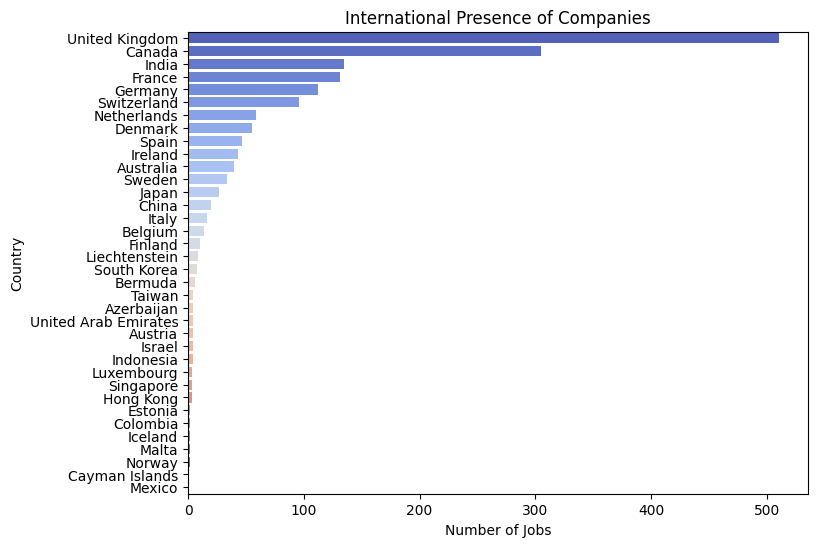

In [ ]:
import seaborn as sns

# Filter international jobs
international_jobs = jobpost_df[(jobpost_df['country'] != 'United States') & (jobpost_df['country'] != 'Unknown')]
international_counts = international_jobs['country'].value_counts()

# Create a visually pleasing diverging color palette
colors = sns.color_palette("coolwarm", n_colors=len(international_counts))

# Create a horizontal bar chart using plotly express
ipc = px.bar(
    x=international_counts.values,
    y=international_counts.index,
    orientation='h',
    color=international_counts.index,
    color_discrete_sequence=colors,
    labels={'x': 'Number of Jobs', 'y': 'Country'},
    title='International Presence of Companies'
)

# Plotting the International Presence using a horizontal bar chart with a diverging color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=international_counts.values, y=international_counts.index, palette=colors)
plt.title('International Presence of Companies')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.show()

In [15]:
# Creative Visualization: Sunburst Chart for Experience Level and Work Type
import plotly.express as px

fig = px.sunburst(jobpost_df, path=['formatted_experience_level', 'formatted_work_type'],
                  title='Sunburst Chart for Experience Level and Work Type')
fig.show()

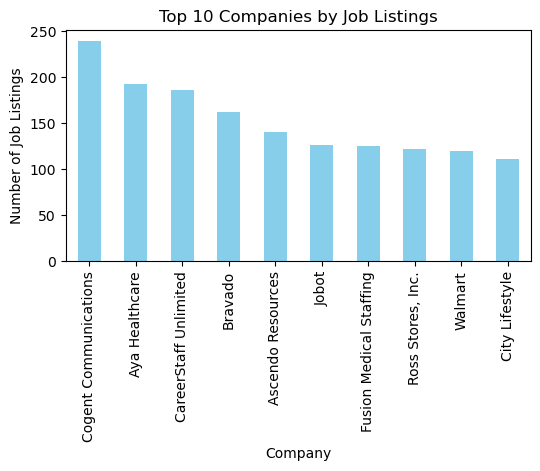

In [16]:
top_companies = jobpost_df['name'].value_counts().head(10)

plt.figure(figsize=(6, 3))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Job Listings')
plt.xlabel('Company')
plt.ylabel('Number of Job Listings')
plt.show()


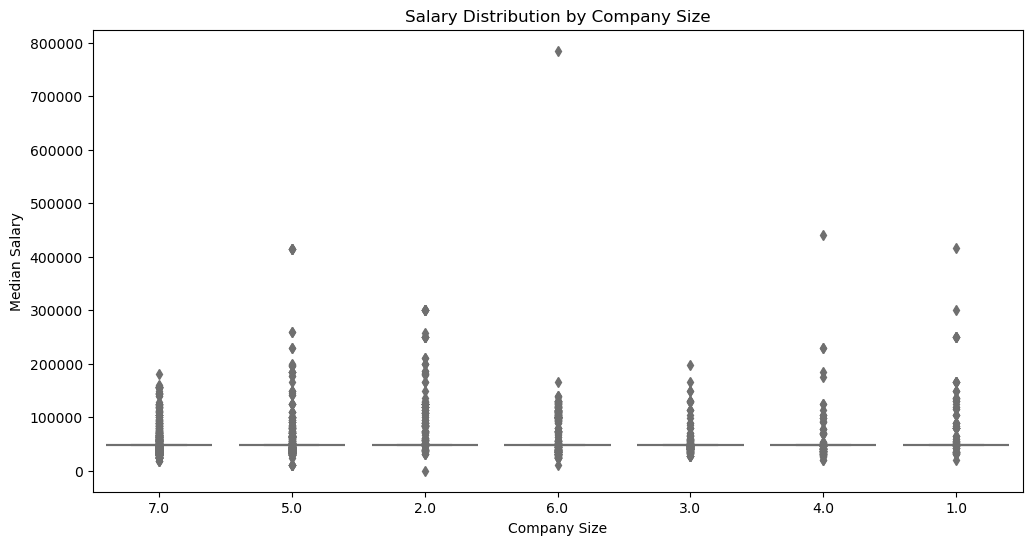

In [20]:
# Box Plot for Salary Distribution by Company Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='med_salary', data=jobpost_df, order=jobpost_df['company_size'].value_counts().index, palette='pastel')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Median Salary')
plt.show()


#EDA Around Jobs

In [21]:
# 2. Jobs Distribution by States in the United States

state_counts = jobpost_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'Number of Jobs']

fig_state_map = px.choropleth(state_counts,
                              locations='state', locationmode='USA-states',
                              color='Number of Jobs', color_continuous_scale='Viridis',
                              labels={'State': 'State', 'Number of Jobs': 'Number of Jobs'},
                              title='Jobs Distribution by States in the United States')
fig_state_map.update_layout(geo_scope='usa')

fig_state_map.show()

# Save the figure as an HTML file
fig_state_map.write_html('jobs_map_by_US_states.html')

In [ ]:
# 3. Global Job Opportunities Sunburst: Unveiling Hierarchical Insights from Country to City

grouped_df = jobpost_df.groupby(['country', 'state', 'city']).size().reset_index(name='job_count')

fig_sunburst_hierarchy = px.sunburst(grouped_df, path=['country', 'state', 'city'],
                                     values='job_count',
                                     title='Global Job Opportunities Sunburst: Unveiling Hierarchical Insights from Country to City',
                                     height=600)
fig_sunburst_hierarchy.show()
# Save the sunburst chart as an HTML file
fig_sunburst_hierarchy.write_html("sunburst_chart.html")

Data Visualization around Skills

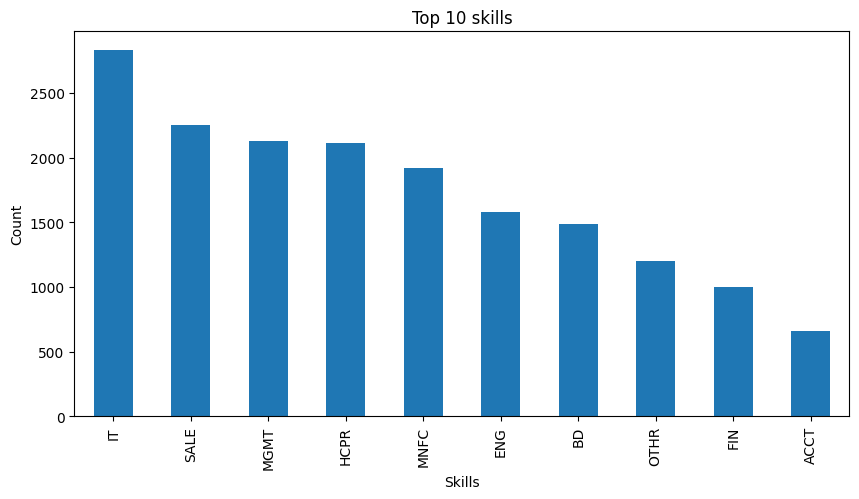

In [ ]:
# Count of each skill
skill_counts = jobpost_df['skill_abr'].value_counts()
# Top 10 skills
top_skills = skill_counts[:10]

# Plot
plt.figure(figsize=(10,5))
top_skills.plot(kind='bar')
plt.title('Top 10 skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

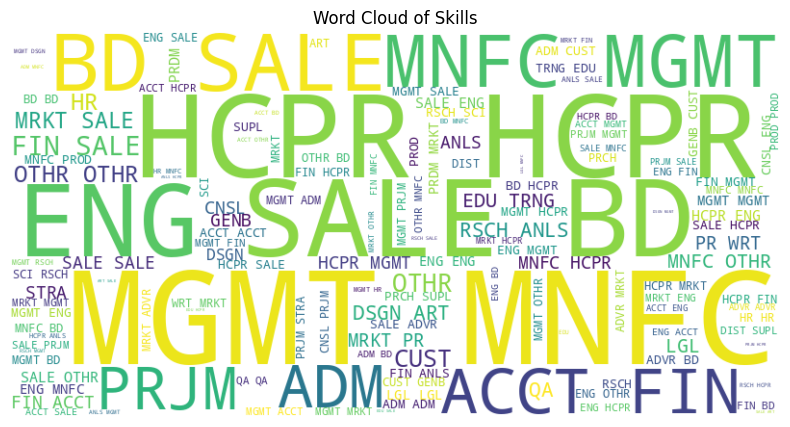

In [ ]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(jobpost_df['skill_abr']))

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills')
plt.show()

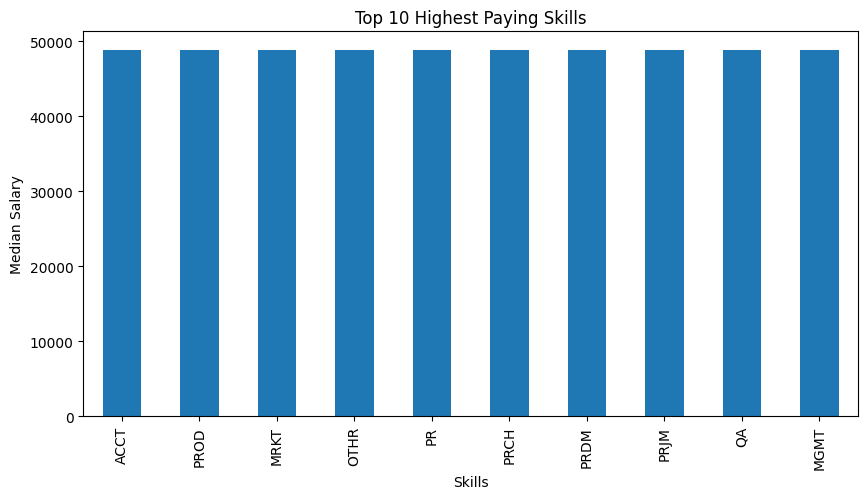

In [ ]:
# Calculate median salary for each skill
skill_med_salary = jobpost_df.groupby('skill_abr')['med_salary'].median().sort_values(ascending=False)

# Top 10 highest paying skills
top_paying_skills = skill_med_salary[:10]

# Plot
plt.figure(figsize=(10,5))
top_paying_skills.plot(kind='bar')
plt.title('Top 10 Highest Paying Skills')
plt.xlabel('Skills')
plt.ylabel('Median Salary')
plt.show()

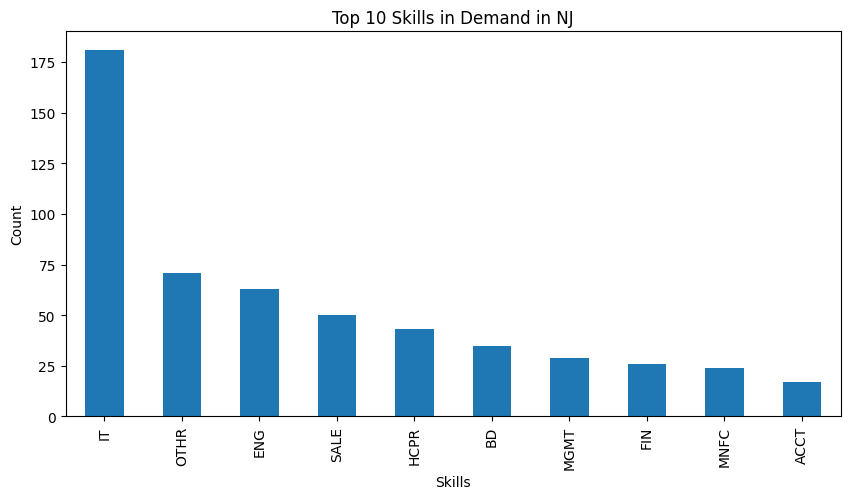

In [ ]:
# Count of each skill by location
skill_counts_by_location = jobpost_df.groupby('state')['skill_abr'].value_counts()

# Top 10 skills in demand by location
top_skills_by_location = skill_counts_by_location.groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

# Plot for a specific location (replace 'San Jose' with your desired location)
state = 'NJ'
top_skills_in_location = top_skills_by_location.loc[state]

plt.figure(figsize=(10,5))
top_skills_in_location.plot(kind='bar')
plt.title(f'Top 10 Skills in Demand in {state}')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

**EDA around Salaries**


In [ ]:
import plotly.express as px

jobpost_df = jobpost_df.dropna(subset=['max_salary', 'med_salary', 'min_salary'])


salary_summary = jobpost_df[['max_salary', 'med_salary', 'min_salary']].mean()

pie_chart = px.pie(salary_summary, values=salary_summary.values, names=salary_summary.index, title='Average Salary Distribution')
pie_chart.show()

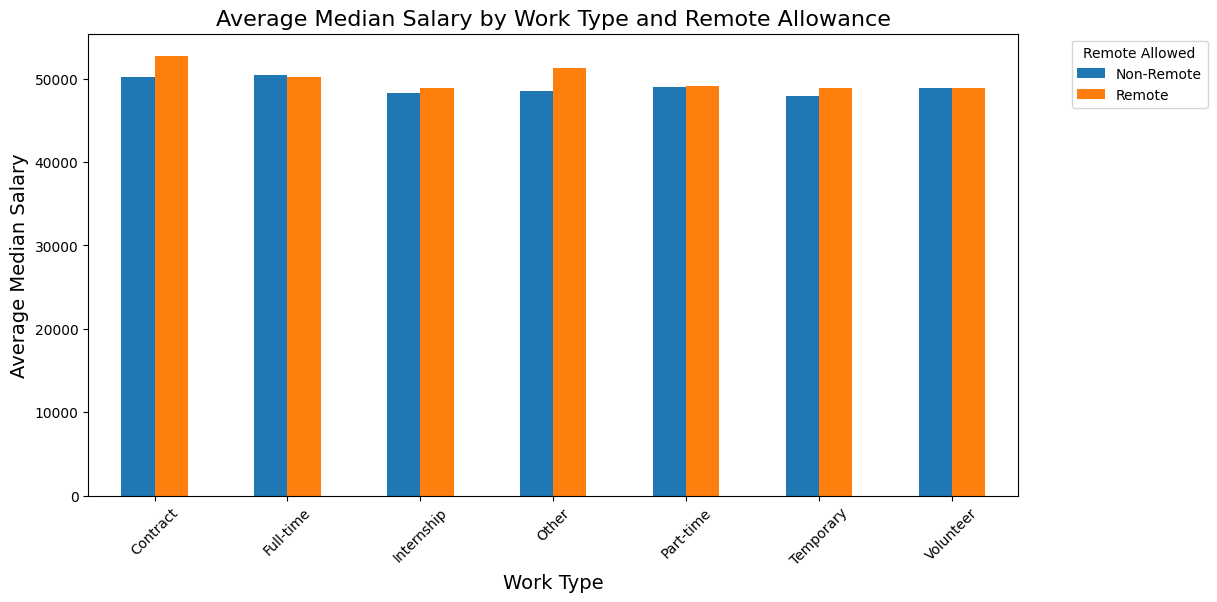

In [ ]:
jobpost_df['remote_allowed'] = jobpost_df['remote_allowed'].map({0.0: 'Non-Remote', 1.0: 'Remote'})

# Calculating average salaries for the combinations of work type and remote allowance
grouped_salaries = jobpost_df.groupby(['formatted_work_type', 'remote_allowed'])['med_salary'].mean().unstack()

# Plotting the grouped bar chart
grouped_salaries.plot(kind='bar', figsize=(12, 6))
plt.title('Average Median Salary by Work Type and Remote Allowance', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Average Median Salary', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Remote Allowed', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting the legend position
plt.show()


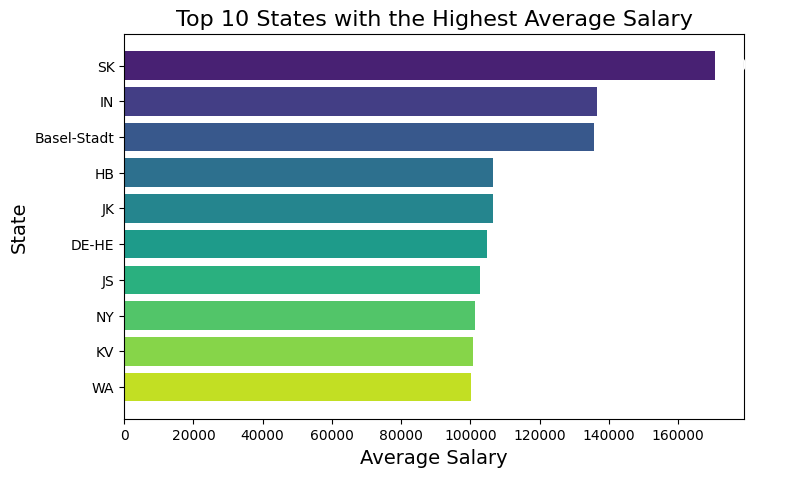

In [ ]:
jobpost_df['average_salary'] = (jobpost_df['min_salary'] + jobpost_df['max_salary']) / 2

# Calculate average salary by state and select the top 10 states with the highest average salary
average_salary_by_state = jobpost_df.groupby('state')['average_salary'].mean().sort_values(ascending=False).head(10)

# Setting a more attractive color palette
sns.set_palette("viridis")

# Plotting the enhanced horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(average_salary_by_state.index, average_salary_by_state.values, color=sns.color_palette("viridis", 10))
plt.title('Top 10 States with the Highest Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest salary at the top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=12, color='white')

plt.show()

In [ ]:
work_type_salaries = jobpost_df.groupby('formatted_work_type')['med_salary'].mean().reset_index()

bar_chart = px.bar(work_type_salaries, x='formatted_work_type', y='med_salary', color='med_salary', text='med_salary')
bar_chart.update_layout(title='Interactive Bar Chart of Average Salaries Across Work Types', xaxis_title='Work Type', yaxis_title='Average Median Salary')
bar_chart.show()

#Dashboard (Separate .py script)

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of your dashboard
app.layout = html.Div([
    html.H1("LinkedIn Job Postings Dashboard"),

    # Count of each skill by location
    dcc.Graph(
        id='skill-counts-by-location',
        figure={
            'data': [
                {'x': skill_counts_by_location.loc[state].index, 'y': skill_counts_by_location.loc[state].values, 'type': 'bar', 'name': f'Skill Counts in {state}'},
            ],
            'layout': {
                'title': f'Skill Counts in {state}',
                'xaxis': {'title': 'Skills'},
                'yaxis': {'title': 'Count'},
            }
        }
    ),

    # Top 10 skills in demand by location
    dcc.Graph(
        id='top-skills-by-location',
        figure={
            'data': [
                {'x': top_skills_in_location.index, 'y': top_skills_in_location.values, 'type': 'bar', 'name': f'Top Skills in Demand in {state}'},
            ],
            'layout': {
                'title': f'Top Skills in Demand in {state}',
                'xaxis': {'title': 'Skills'},
                'yaxis': {'title': 'Count'},
            }
        }
    ),

    # Calculate median salary for each skill
    dcc.Graph(
        id='median-salary-by-skill',
        figure={
            'data': [
                {'x': top_paying_skills.index, 'y': top_paying_skills.values, 'type': 'bar', 'name': 'Median Salary by Skill'},
            ],
            'layout': {
                'title': 'Top 10 Highest Paying Skills',
                'xaxis': {'title': 'Skills'},
                'yaxis': {'title': 'Median Salary'},
            }
        }
    ),

    # Sunburst chart for location hierarchy
      dcc.Graph(
          id='sunburst-hierarchy',
          figure=fig_sunburst_hierarchy  # Pass the Plotly figure to the 'figure' attribute
      ),

 # Sunburst chart for company job opening hierarchy

    dcc.Graph(
        id='sunburst-chart',
        figure=fig
    ),

    # International Presence of companies
    dcc.Graph(
        id='international-presence-chart',
        figure=ipc
    ),

])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-3-3ad687d31cce>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-3-3ad687d31cce>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


NameError: ignored